In [20]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

In [21]:
img = cv2.imread('/home/saksham/Desktop/unsplash images/all_images/6cb46f.jpg')

In [22]:
img.shape

(600, 400, 3)

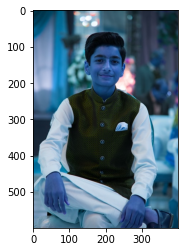

In [23]:
plt.imshow(img)

In [24]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(600, 400)

In [25]:
gray

array([[ 61,  61,  61, ...,  41,  43,  44],
       [ 62,  62,  62, ...,  42,  44,  45],
       [ 63,  62,  62, ...,  44,  46,  47],
       ...,
       [128, 131, 135, ...,  56,  56,  56],
       [140, 143, 143, ...,  56,  56,  56],
       [141, 145, 142, ...,  56,  56,  56]], dtype=uint8)

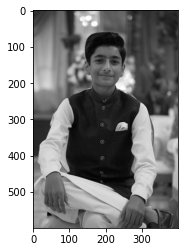

In [26]:
plt.imshow(gray, cmap='gray')

In [27]:
face_cascade = cv2.CascadeClassifier('/home/saksham/Desktop/opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/home/saksham/Desktop/opencv-master/data/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[144,  93, 121, 121]], dtype=int32)

In [28]:
(x,y,w,h) = faces[0]
x,y,w,h

(144, 93, 121, 121)

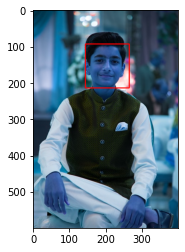

In [29]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

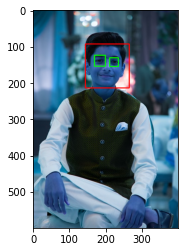

In [30]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

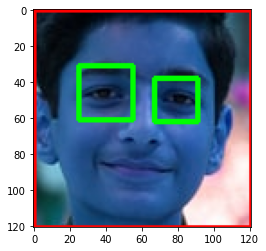

In [31]:
plt.imshow(roi_color, cmap='gray')

In [32]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

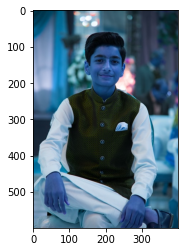

In [33]:
original_image = cv2.imread('/home/saksham/Desktop/unsplash images/all_images/6cb46f.jpg')
plt.imshow(original_image)

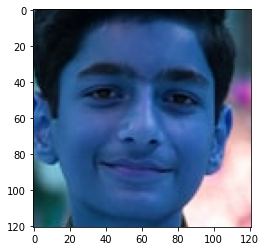

In [34]:
cropped_image = get_cropped_image_if_2_eyes('/home/saksham/Desktop/unsplash images/all_images/6cb46f.jpg')
plt.imshow(cropped_image)

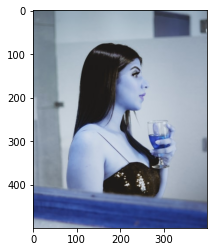

In [42]:
org_image_obstructed = cv2.imread('/home/saksham/Desktop/unsplash images/all_images/5f611b.jpg')
plt.imshow(org_image_obstructed)

In [36]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/home/saksham/Desktop/unsplash images/all_images/5f611b.jpg')
cropped_image_no_2_eyes

In [37]:
path_to_data = "/home/saksham/Desktop/unsplash images/"
path_to_cr_data = "/home/saksham/Desktop/unsplash images/cropped/"

In [38]:
import os
img_dirs = ['/home/saksham/Desktop/unsplash images/all_images']

In [39]:
img_dirs

['/home/saksham/Desktop/unsplash images/all_images']

In [40]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

all_images
Generating cropped images in folder:  /home/saksham/Desktop/unsplash images/cropped/all_images
